If you would like to investigate the CNN in different ways, use https://github.com/utkuozbulak/pytorch-cnn-visualizations as a reference.

In [1]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

from visualization_utils import preprocess_image, convert_to_grayscale
from guided_backprop import GuidedBackprop

In [2]:
model = torch.load('../models/trained_model.pt', map_location=torch.device('cpu'))
model = model.eval()

In [3]:
folder = 1
os.listdir(f'images/{folder}')

['water_1.png',
 'urban_2.png',
 'road_hard.png',
 'bad_image.png',
 'water_2.png',
 'road_easy.png',
 'urban_1.png',
 'urban_hard.png',
 'road_medium.png']

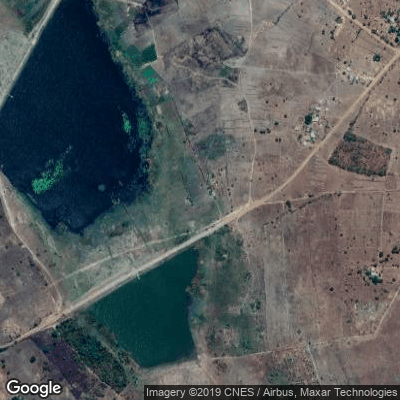

In [4]:
choice = 'water_1.png'
image_dir = f'images/{folder}/{choice}'
image = Image.open(image_dir).convert('RGB')
image

In [5]:
proc_image = preprocess_image(image)
target_class = folder - 1

# prediction by model
print('prediction:', model(proc_image))
print('target:', target_class)

prediction: tensor([[ 2.2666,  1.3463, -3.6122]], grad_fn=<AddmmBackward>)
target: 0


In [6]:
GBP = GuidedBackprop(model)
guided_grads = GBP.generate_gradients(proc_image, target_class)
grayscale_guided_grads = convert_to_grayscale(guided_grads)

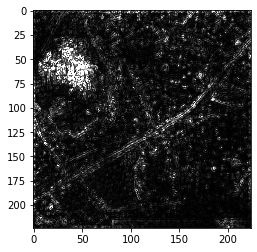

In [7]:
plt.imshow(np.squeeze(grayscale_guided_grads.transpose(1, 2, 0)), cmap='gray', vmin=0, vmax=1)